In [ ]:
 !pip install opencv-python matplotlib imageio gdown tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio


In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
device = tf.config.list_physical_devices('GPU') 
try:
  tf.config.experimental.set_memory_growth(device[0],True)
except:
  pass
  

In [ ]:
import gdown

In [ ]:
url = "https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL"
output = 'data.zip'
gdown.download(url, output,quiet=False)
gdown.extractall('data.zip')



Downloading...
From: https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
To: /content/data.zip
100%|██████████| 423M/423M [00:04<00:00, 105MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [ ]:
def load_video(path:str) -> List[float]:

  pox = cv2.VideoCapture(path) #responsible for reading frames from the video
  frames=[] #creating an empty list to store the frames
  
  for _ in range(int(pox.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret,frame = pox.read() #ret = if it was read or not and frame suggests konsa frame
    frame = tf.image.rgb_to_grayscale(frame) #This line converts the frame from RGB (Red, Green, Blue) color format to grayscale using TensorFlow's rgb_to_grayscale function. Grayscale represents the image with only shades of gray, simplifying further processing.
    frames.append(frame[190:236,80:220,:]) #specific part nikalta hai
  pox.release()
  mean = tf.math.reduce_mean(frames)
  std = tf.math.reduce_std(tf.cast(frames,tf.float32))
  return tf.cast((frames-mean),tf.float32)/std 
  

In [ ]:
load_video('/content/data/s1/bbaf2n.mpg')

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[1.4991664 ],
         [1.4991664 ],
         [1.4616872 ],
         ...,
         [0.41227075],
         [0.41227075],
         [0.41227075]],

        [[1.4991664 ],
         [1.4991664 ],
         [1.4616872 ],
         ...,
         [0.41227075],
         [0.41227075],
         [0.41227075]],

        [[1.4616872 ],
         [1.4616872 ],
         [1.4991664 ],
         ...,
         [0.33731243],
         [0.33731243],
         [0.33731243]],

        ...,

        [[1.0494164 ],
         [1.0494164 ],
         [1.0119373 ],
         ...,
         [0.11243747],
         [0.11243747],
         [0.07495832]],

        [[1.0494164 ],
         [1.0494164 ],
         [1.0119373 ],
         ...,
         [0.11243747],
         [0.07495832],
         [0.07495832]],

        [[1.0494164 ],
         [1.0494164 ],
         [1.0119373 ],
         ...,
         [0.07495832],
         [0.07495832],
         [0.03747916]]],


  

In [ ]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [ ]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [ ]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab,oov_token="")


In [ ]:
char_to_num(['d','j','n'])

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 4, 10, 14])>

In [ ]:
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(),oov_token="",invert=True)

In [ ]:
num_to_char([3,7])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'c', b'g'], dtype=object)>

In [ ]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [ ]:
def load_alignments(path:str) -> List[str]:
  with open(path, 'r') as f:
    lines = f.readlines()
  tokens = []
  for line in lines:
    line = line.split()
    
    if line[2]!='sil':
      tokens.append(line[2])
  # return tokens
  return char_to_num(tf.reshape(tf.strings.unicode_split(tokens,input_encoding='UTF-8'),(-1)))[0:]


In [ ]:
load_alignments('/content/data/alignments/s1/bbaf2n.align')

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([ 2,  9, 14,  2, 12, 21,  5,  1, 20,  6, 20, 23, 15, 14, 15, 23])>

In [ ]:
def load_data(path: str): 
    path = str(path.numpy(), 'utf-8')
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('/content','data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('/content','data','alignments','s1',f'{file_name}.align')
    
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments


In [ ]:
video_path = os.path.join('/content','data','s1','bbal6n.mpg')
video_path

'/content/data/s1/bbal6n.mpg'

In [ ]:
test_path = '/content/data/s1/bbal6n.mpg'

In [ ]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [ ]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[ 1.4603736 ],
          [ 1.4603736 ],
          [ 1.4209042 ],
          ...,
          [ 0.15787823],
          [ 0.19734779],
          [ 0.07893912]],
 
         [[ 1.4603736 ],
          [ 1.4603736 ],
          [ 1.4209042 ],
          ...,
          [ 0.15787823],
          [ 0.07893912],
          [ 0.03946956]],
 
         [[ 1.4209042 ],
          [ 1.4209042 ],
          [ 1.3814346 ],
          ...,
          [ 0.07893912],
          [ 0.07893912],
          [ 0.07893912]],
 
         ...,
 
         [[ 0.9472694 ],
          [ 0.9472694 ],
          [ 0.9472694 ],
          ...,
          [ 9.946329  ],
          [ 9.86739   ],
          [ 9.86739   ]],
 
         [[ 0.9472694 ],
          [ 0.9472694 ],
          [ 0.9472694 ],
          ...,
          [ 9.906859  ],
          [ 9.86739   ],
          [ 9.86739   ]],
 
         [[ 0.9472694 ],
          [ 0.9472694 ],
          [ 0.9472694 ],
          

In [ ]:
frames, alignments = load_data(tf.convert_to_tensor(test_path,dtype=tf.string))

In [ ]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4603736 ],
         [ 1.4603736 ],
         [ 1.4209042 ],
         ...,
         [ 0.15787823],
         [ 0.19734779],
         [ 0.07893912]],

        [[ 1.4603736 ],
         [ 1.4603736 ],
         [ 1.4209042 ],
         ...,
         [ 0.15787823],
         [ 0.07893912],
         [ 0.03946956]],

        [[ 1.4209042 ],
         [ 1.4209042 ],
         [ 1.3814346 ],
         ...,
         [ 0.07893912],
         [ 0.07893912],
         [ 0.07893912]],

        ...,

        [[ 0.9472694 ],
         [ 0.9472694 ],
         [ 0.9472694 ],
         ...,
         [ 9.946329  ],
         [ 9.86739   ],
         [ 9.86739   ]],

        [[ 0.9472694 ],
         [ 0.9472694 ],
         [ 0.9472694 ],
         ...,
         [ 9.906859  ],
         [ 9.86739   ],
         [ 9.86739   ]],

        [[ 0.9472694 ],
         [ 0.9472694 ],
         [ 0.9472694 ],
         ...,
         [ 9.906859  ],
         [ 9.86739

In [ ]:
alignments

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([ 2,  9, 14,  2, 12, 21,  5,  1, 20, 12, 19,  9, 24, 14, 15, 23])>

In [ ]:
frames.shape

TensorShape([75, 46, 140, 1])

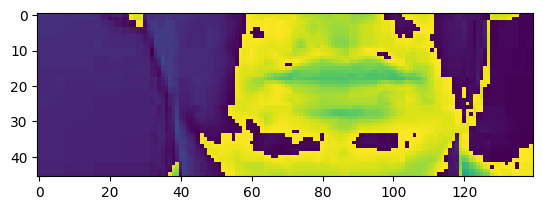

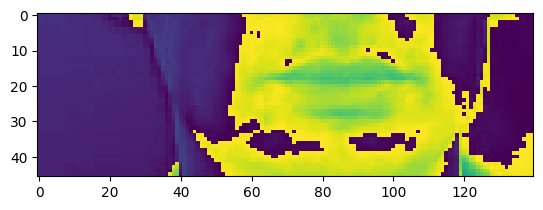

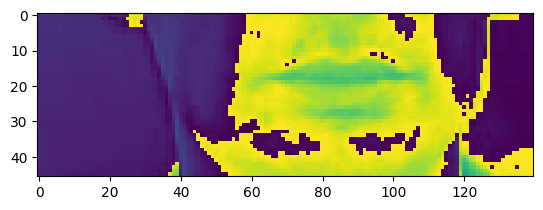

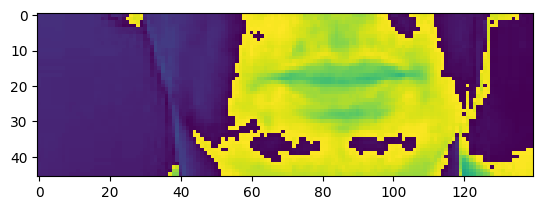

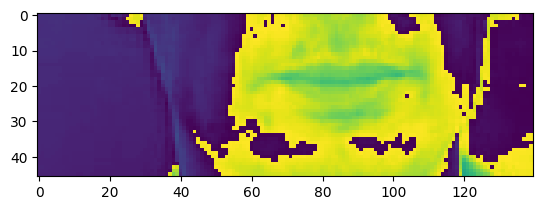

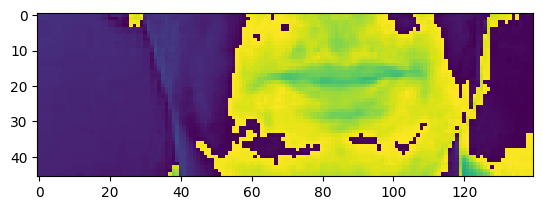

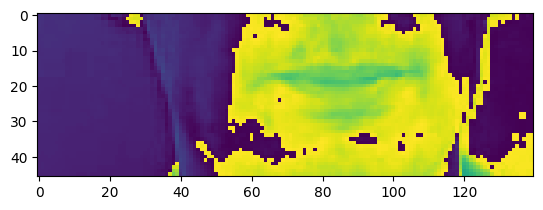

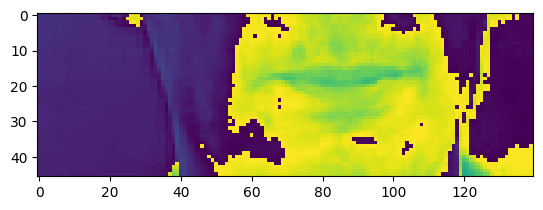

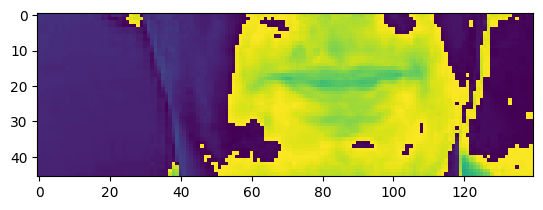

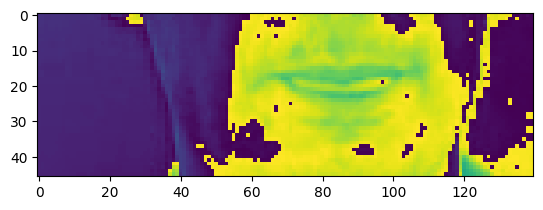

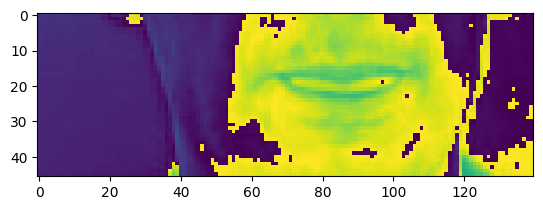

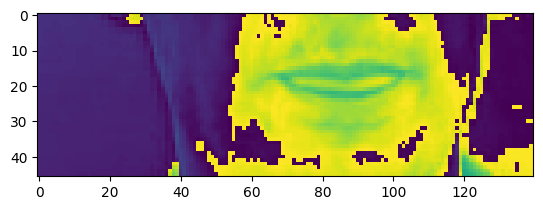

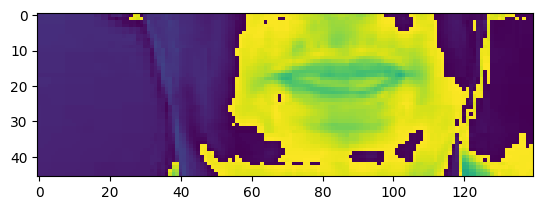

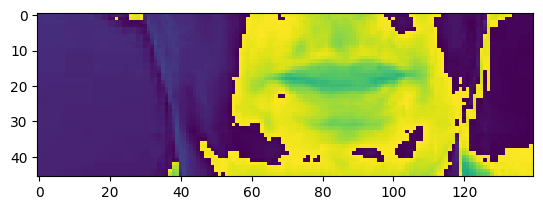

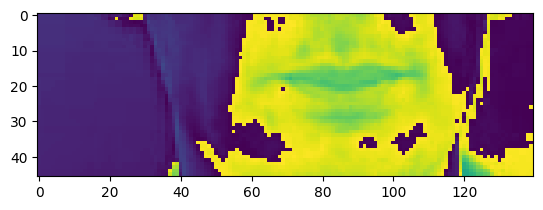

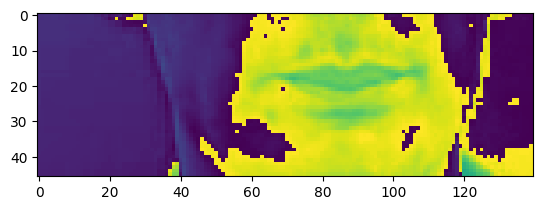

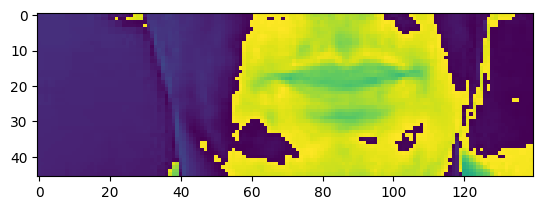

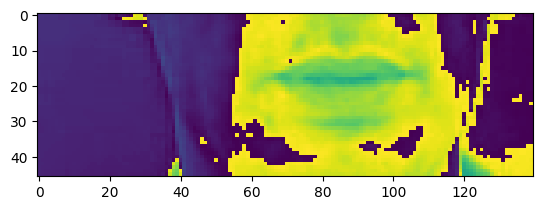

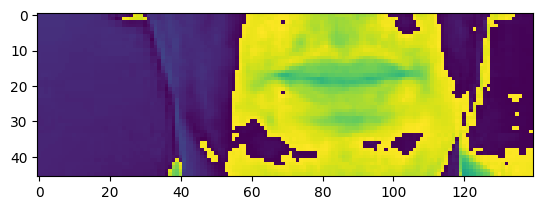

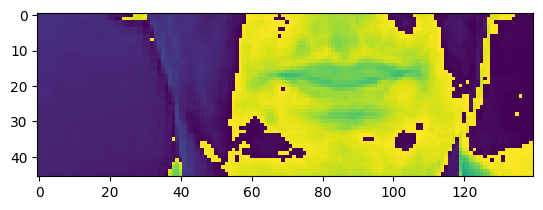

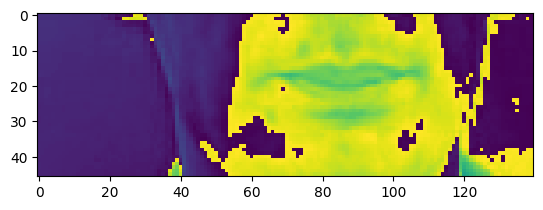

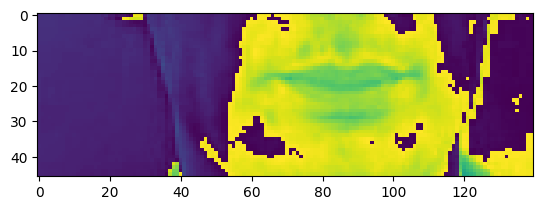

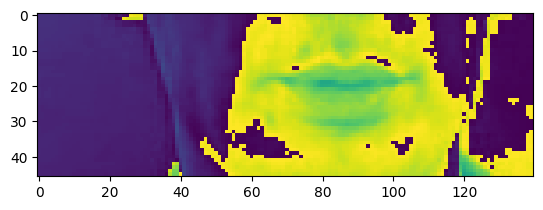

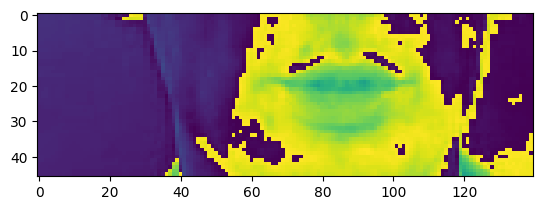

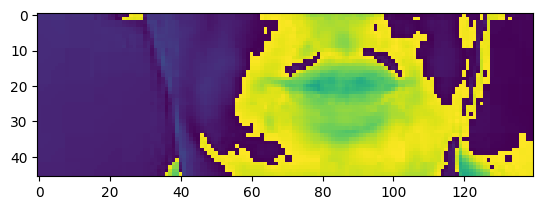

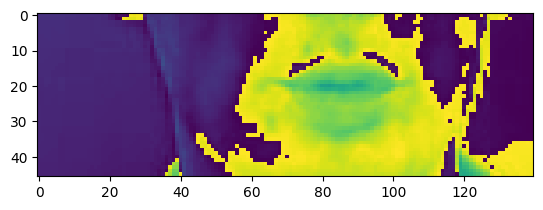

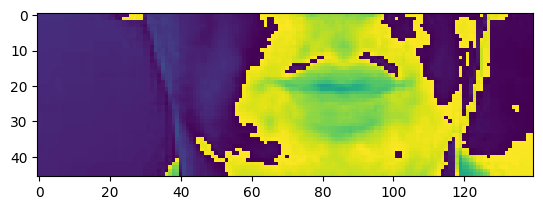

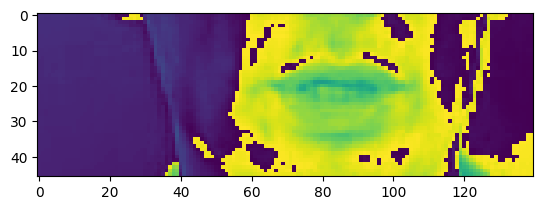

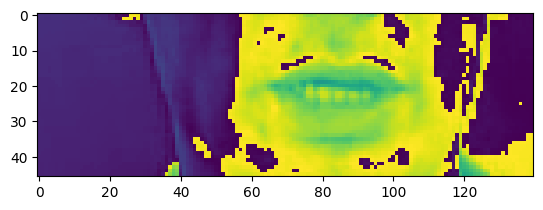

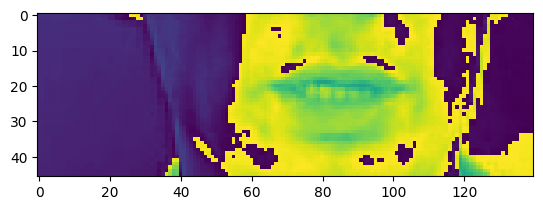

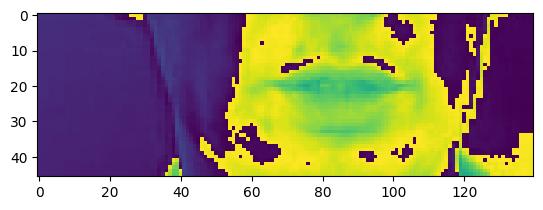

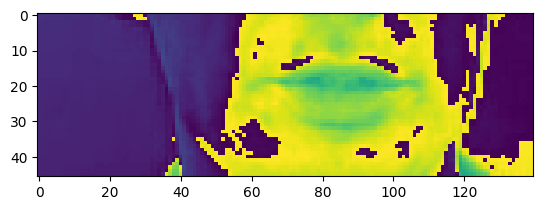

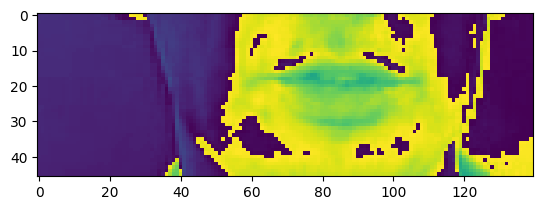

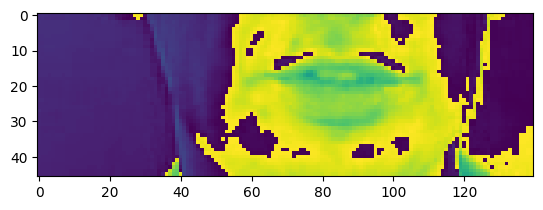

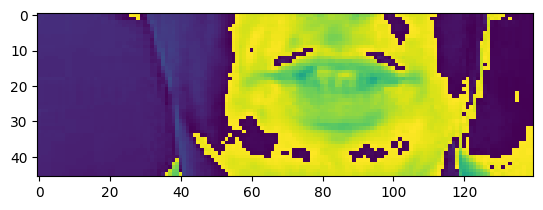

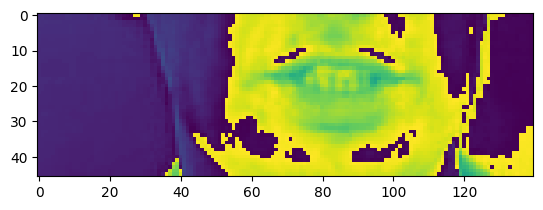

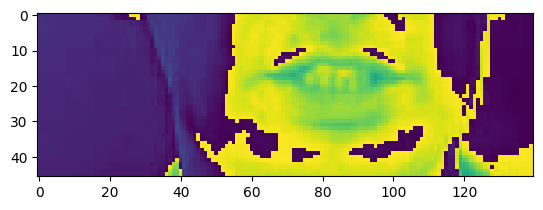

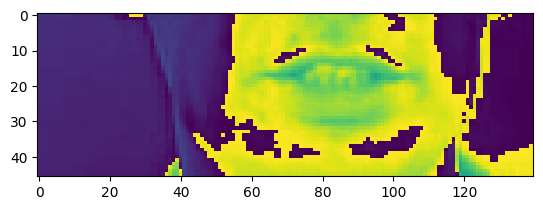

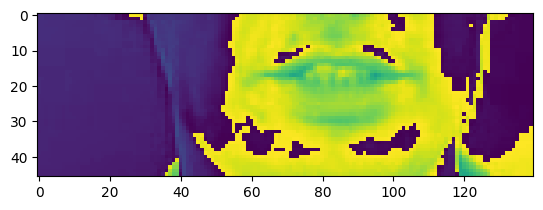

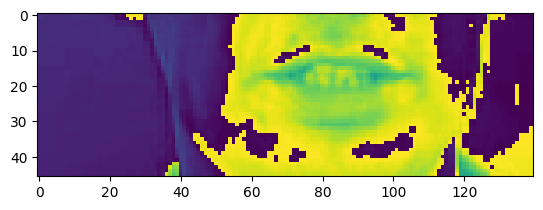

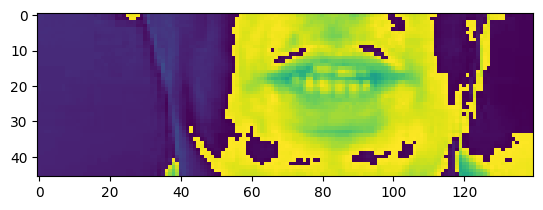

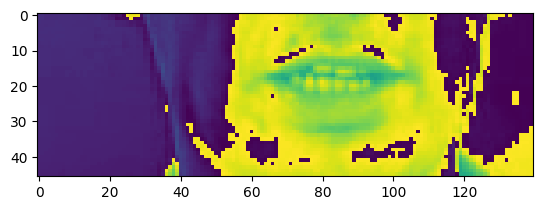

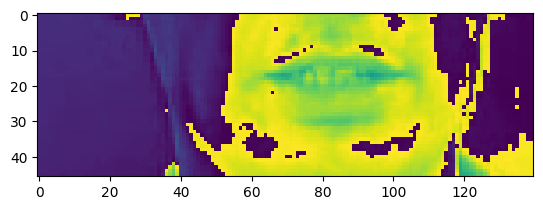

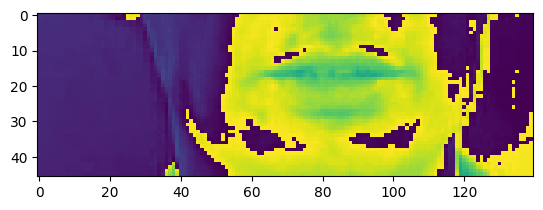

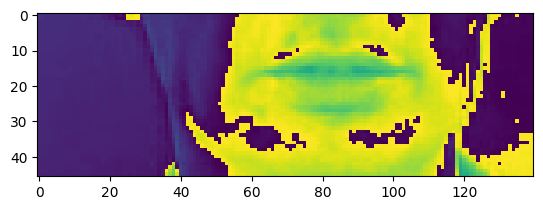

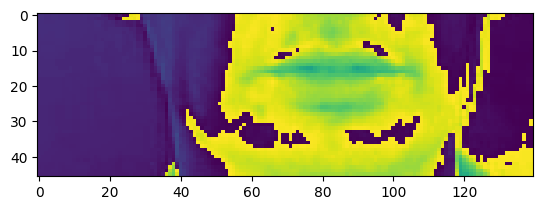

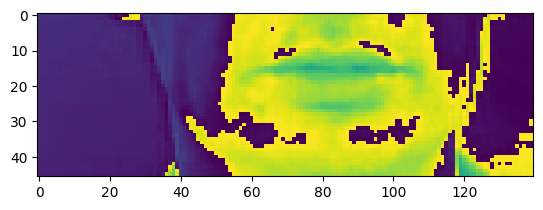

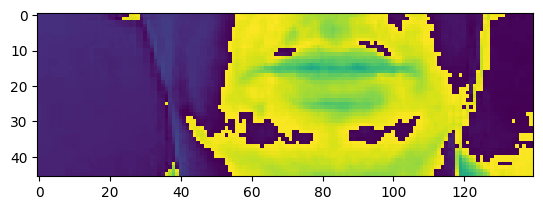

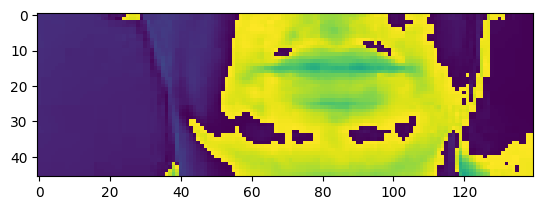

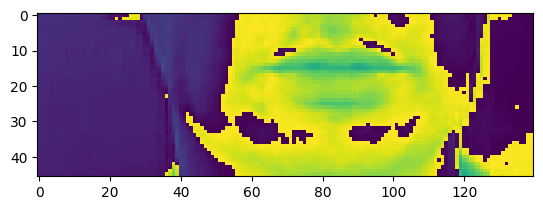

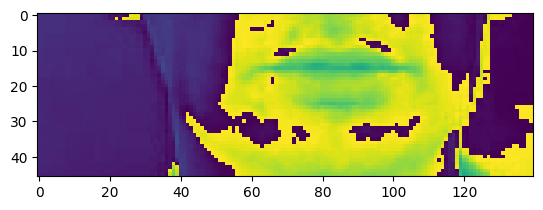

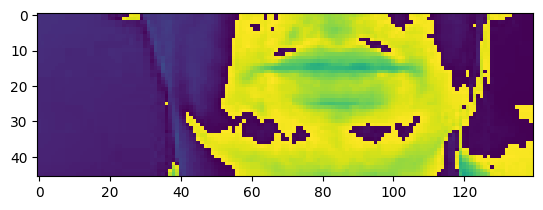

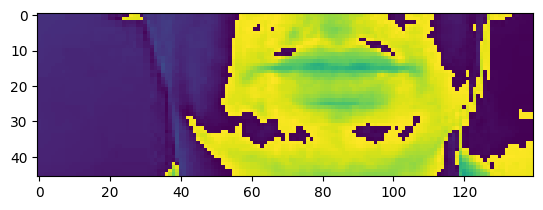

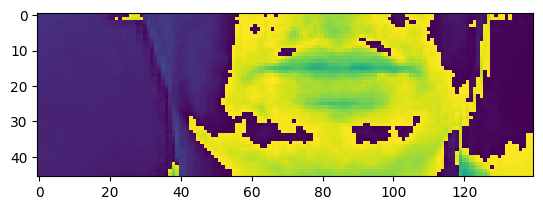

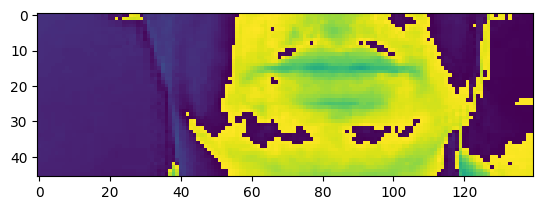

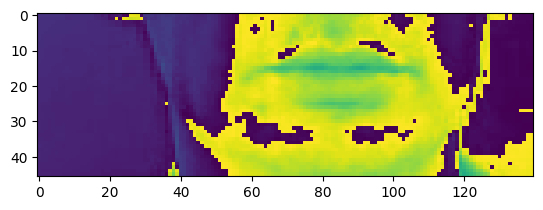

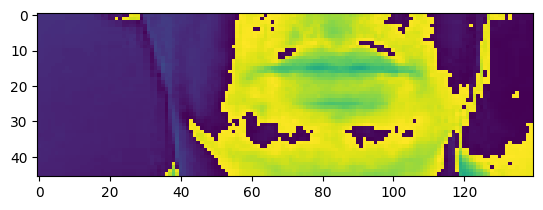

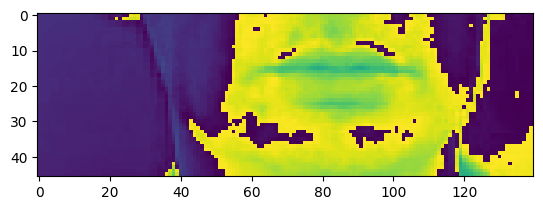

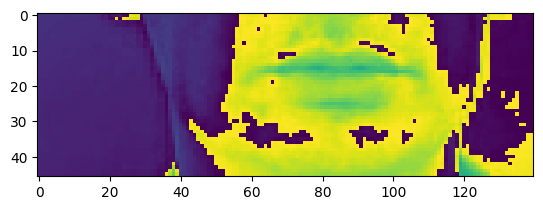

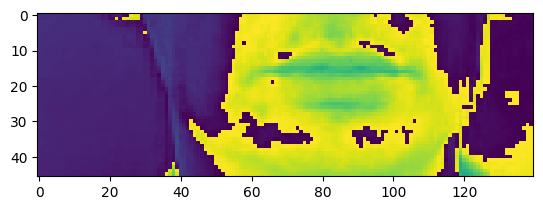

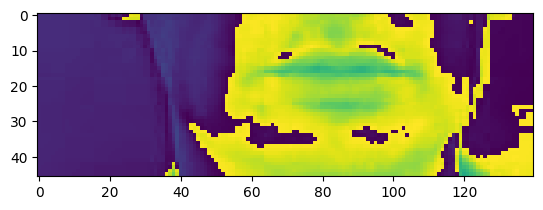

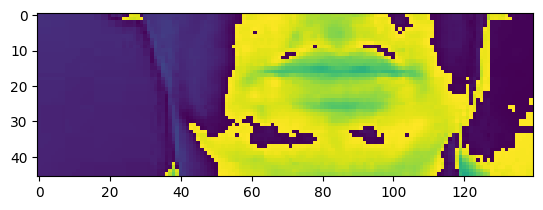

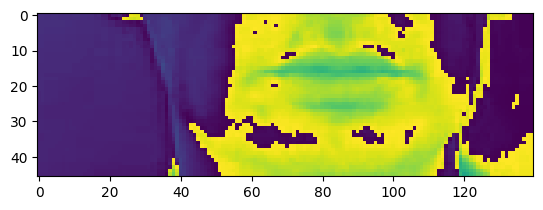

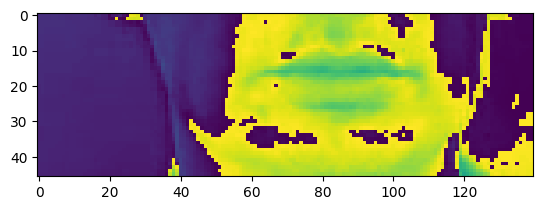

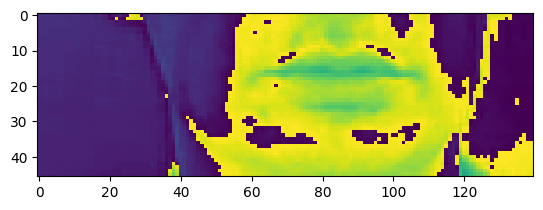

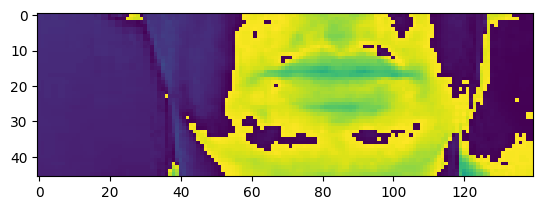

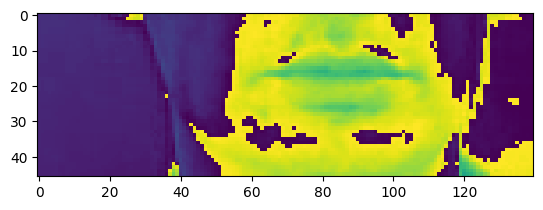

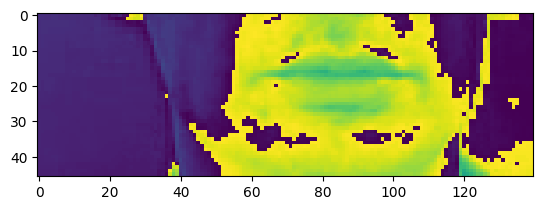

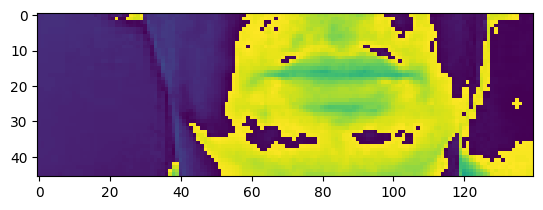

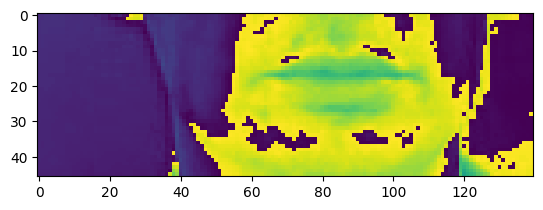

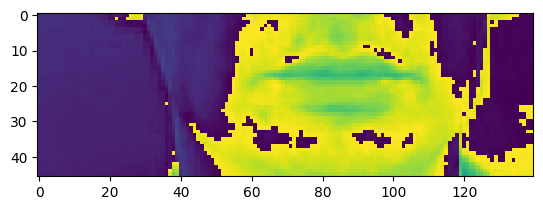

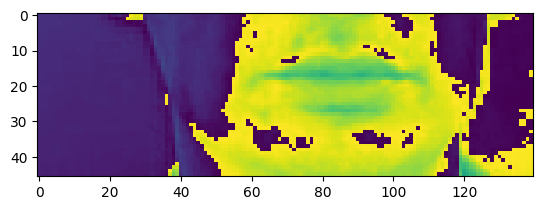

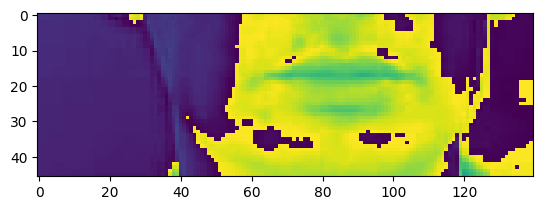

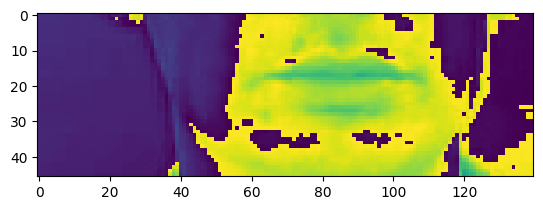

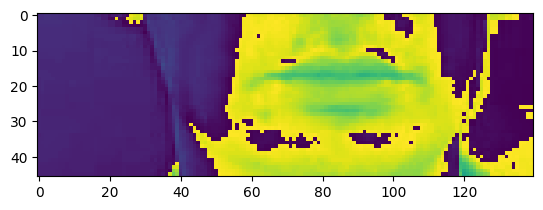

In [ ]:
for i in range(len(frames)):
  plt.imshow(frames[i])
  plt.show()

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'binblueatlsixnow'>

In [ ]:
alignments

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([ 2,  9, 14,  2, 12, 21,  5,  1, 20, 12, 19,  9, 24, 14, 15, 23])>

In [ ]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result


# Data pipelining

In [ ]:
data = tf.data.Dataset.list_files('/content/data/s1/*.mpg')


In [ ]:
data

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
data = data.shuffle(500,reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2,padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)

train=data.take(450)
test=data.take(450)




In [ ]:
frames, alignments = data.as_numpy_iterator().next()

In [ ]:
frames

array([[[[[ 1.3422236 ],
          [ 1.3422236 ],
          [ 1.3817009 ],
          ...,
          [ 9.356089  ],
          [ 0.        ],
          [10.066677  ]],

         [[ 1.3422236 ],
          [ 1.3422236 ],
          [ 1.3817009 ],
          ...,
          [ 9.592952  ],
          [ 9.908769  ],
          [ 9.908769  ]],

         [[ 1.3422236 ],
          [ 1.3422236 ],
          [ 1.3422236 ],
          ...,
          [ 9.987723  ],
          [ 0.07895433],
          [ 0.07895433]],

         ...,

         [[ 0.947452  ],
          [ 0.947452  ],
          [ 0.947452  ],
          ...,
          [10.066677  ],
          [ 9.987723  ],
          [ 9.987723  ]],

         [[ 0.947452  ],
          [ 0.947452  ],
          [ 0.947452  ],
          ...,
          [10.066677  ],
          [10.066677  ],
          [10.066677  ]],

         [[ 0.947452  ],
          [ 0.947452  ],
          [ 0.947452  ],
          ...,
          [10.066677  ],
          [10.066677  ],
          

In [ ]:
alignments

array([[19,  5, 20, 18,  5,  4,  9, 14, 14, 19,  5, 22,  5, 14,  1,  7,
         1,  9, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [12,  1, 25, 18,  5,  4,  2, 25,  5, 19,  5, 22,  5, 14, 19, 15,
        15, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
len(frames)


2

In [ ]:
sample = data.as_numpy_iterator()

In [ ]:
sample

In [ ]:
val = sample.next(); val[0]

array([[[[[1.4183859 ],
          [1.5303637 ],
          [1.5676897 ],
          ...,
          [0.29860756],
          [0.33593348],
          [0.33593348]],

         [[1.4183859 ],
          [1.5676897 ],
          [1.6050155 ],
          ...,
          [0.29860756],
          [0.33593348],
          [0.33593348]],

         [[1.5676897 ],
          [1.5676897 ],
          [1.4183859 ],
          ...,
          [0.37325943],
          [0.33593348],
          [0.33593348]],

         ...,

         [[1.0078005 ],
          [1.0078005 ],
          [1.0078005 ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],

         [[0.97047454],
          [0.97047454],
          [0.97047454],
          ...,
          [0.03732594],
          [0.        ],
          [0.        ]],

         [[0.97047454],
          [0.97047454],
          [0.97047454],
          ...,
          [0.03732594],
          [0.        ],
          [9.518116  ]]],


        [[[1.4930

In [ ]:
len(val)

2

In [ ]:
imageio.mimsave('./animation.gif',val[0][1],fps =10)

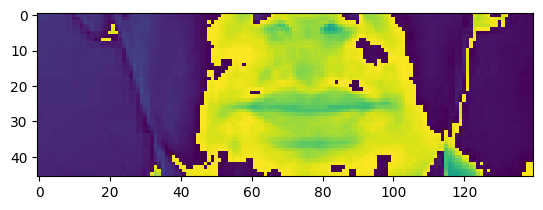

In [ ]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][74])

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'binblueinzonesoon'>

In [ ]:
val[1][0]

array([ 2,  9, 14,  2, 12, 21,  5,  9, 14, 26, 15, 14,  5, 19, 15, 15, 14,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [ ]:
imageio.mimsave('./animation.gif',val[0][1],fps=10)

In [ ]:
val[1]

array([[ 2,  9, 14,  2, 12, 21,  5,  9, 14, 26, 15, 14,  5, 19, 15, 15,
        14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [12,  1, 25, 23,  8,  9, 20,  5, 23,  9, 20,  8,  6, 19,  5, 22,
         5, 14, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][1]])

<tf.Tensor: shape=(), dtype=string, numpy=b'laywhitewithfsevensoon'>

In [ ]:
val[1][1] 

array([12,  1, 25, 23,  8,  9, 20,  5, 23,  9, 20,  8,  6, 19,  5, 22,  5,
       14, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [ ]:
val[0] #frames
val[1] #alignments

array([[ 2,  9, 14,  2, 12, 21,  5,  9, 14, 26, 15, 14,  5, 19, 15, 15,
        14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [12,  1, 25, 23,  8,  9, 20,  5, 23,  9, 20,  8,  6, 19,  5, 22,
         5, 14, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
val[1][0]

array([ 2,  9, 14,  2, 12, 21,  5,  9, 14, 26, 15, 14,  5, 19, 15, 15, 14,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

# **Deep Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [ ]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 75, 46, 140, 128)  3584      
                                                                 
 activation_3 (Activation)   (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 75, 23, 70, 128)  0         
 3D)                                                             
                                                                 
 conv3d_4 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_4 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                  

In [ ]:
 val[0]

array([[[[[1.4183859 ],
          [1.5303637 ],
          [1.5676897 ],
          ...,
          [0.29860756],
          [0.33593348],
          [0.33593348]],

         [[1.4183859 ],
          [1.5676897 ],
          [1.6050155 ],
          ...,
          [0.29860756],
          [0.33593348],
          [0.33593348]],

         [[1.5676897 ],
          [1.5676897 ],
          [1.4183859 ],
          ...,
          [0.37325943],
          [0.33593348],
          [0.33593348]],

         ...,

         [[1.0078005 ],
          [1.0078005 ],
          [1.0078005 ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],

         [[0.97047454],
          [0.97047454],
          [0.97047454],
          ...,
          [0.03732594],
          [0.        ],
          [0.        ]],

         [[0.97047454],
          [0.97047454],
          [0.97047454],
          ...,
          [0.03732594],
          [0.        ],
          [9.518116  ]]],


        [[[1.4930

In [ ]:
ystar = model.predict(val[0])

1/1 [==============================] - 24s 24s/step


In [ ]:
ystar[0]

array([[0.02291894, 0.01617172, 0.0234187 , ..., 0.02497619, 0.02280756,
        0.02688679],
       [0.02278012, 0.01531171, 0.02208666, ..., 0.02433433, 0.02293314,
        0.0273893 ],
       [0.02269559, 0.01467811, 0.02139746, ..., 0.02362581, 0.022732  ,
        0.0278554 ],
       ...,
       [0.02462152, 0.0191941 , 0.02317201, ..., 0.01960959, 0.0194181 ,
        0.02849197],
       [0.02593277, 0.02010895, 0.02361971, ..., 0.01998824, 0.01925219,
        0.02864843],
       [0.02772522, 0.02051153, 0.02398876, ..., 0.02065413, 0.01905083,
        0.02847065]], dtype=float32)

In [ ]:
tf.argmax(ystar[0],axis=1)

<tf.Tensor: shape=(75,), dtype=int64, numpy=
array([4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8])>

In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(ystar[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'ddddddddhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh'>

In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(ystar[0])])

<tf.Tensor: shape=(), dtype=string, numpy=b'6c4qh8laz'>

In [ ]:

model.input_shape

(None, 75, 46, 140, 1)

In [ ]:
model.output_shape

(None, 75, 41)

In [ ]:
ystar[1]

array([[0.02332031, 0.01457336, 0.02607148, ..., 0.02637043, 0.02103736,
        0.02337984],
       [0.02287951, 0.01378827, 0.02541055, ..., 0.02695451, 0.02115254,
        0.0237234 ],
       [0.02267253, 0.01328585, 0.02516022, ..., 0.02741783, 0.02097957,
        0.02392424],
       ...,
       [0.02449553, 0.01737238, 0.03175019, ..., 0.02460049, 0.01928707,
        0.02610445],
       [0.02565135, 0.01852635, 0.03131685, ..., 0.0248105 , 0.01929505,
        0.026393  ],
       [0.0272787 , 0.01938174, 0.03034912, ..., 0.02537196, 0.01914142,
        0.02636528]], dtype=float32)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64") //75
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64") //41

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss


In [ ]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [ ]:
from tensorflow.keras.optimizers import legacy
optimizer = legacy.Adam()

In [ ]:
model.compile(optimizer=legacy.Adam(learning_rate=0.0001), loss=CTCLoss)

In [ ]:
schedule_callback = LearningRateScheduler(scheduler) 

In [ ]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 
example_callback = ProduceExample(test)

In [ ]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From: https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:00<00:00, 172MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [ ]:
model.load_weights('models/checkpoint')

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
sample = test_data.next()

In [ ]:
yhat = model.predict(sample[0])

1/1 [==============================] - 13s 13s/step


In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'laywhitebyzsevenagain'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'placewhiteinxzeronow'>]

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay white by z seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place white in x zero now'>]